## This Project goal is to identify the Risk of a person getting a heart attack using a data collected collected from the patients

## Import The Libraries

In [2]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
import missingno
warnings.filterwarnings('ignore')
## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

## sklearn -- models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb


## skelarn -- metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load The Dataset

In [3]:
TRAIN_DATA_PATH = os.path.join(os.getcwd(), 'heart.csv')
df = pd.read_csv(TRAIN_DATA_PATH)

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Check The Datatypes of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## So The Data is Numeric Without Categorial Features maybe we can add some later

## Let's Check The Unique Values in each features

In [5]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Check The Data For Nan Values or '0' Values our Duplicated Values

In [6]:
df.duplicated().sum() ## There's one Duplicated Value we need to remove

1

In [7]:
df.drop_duplicates(inplace=True)


<Axes: >

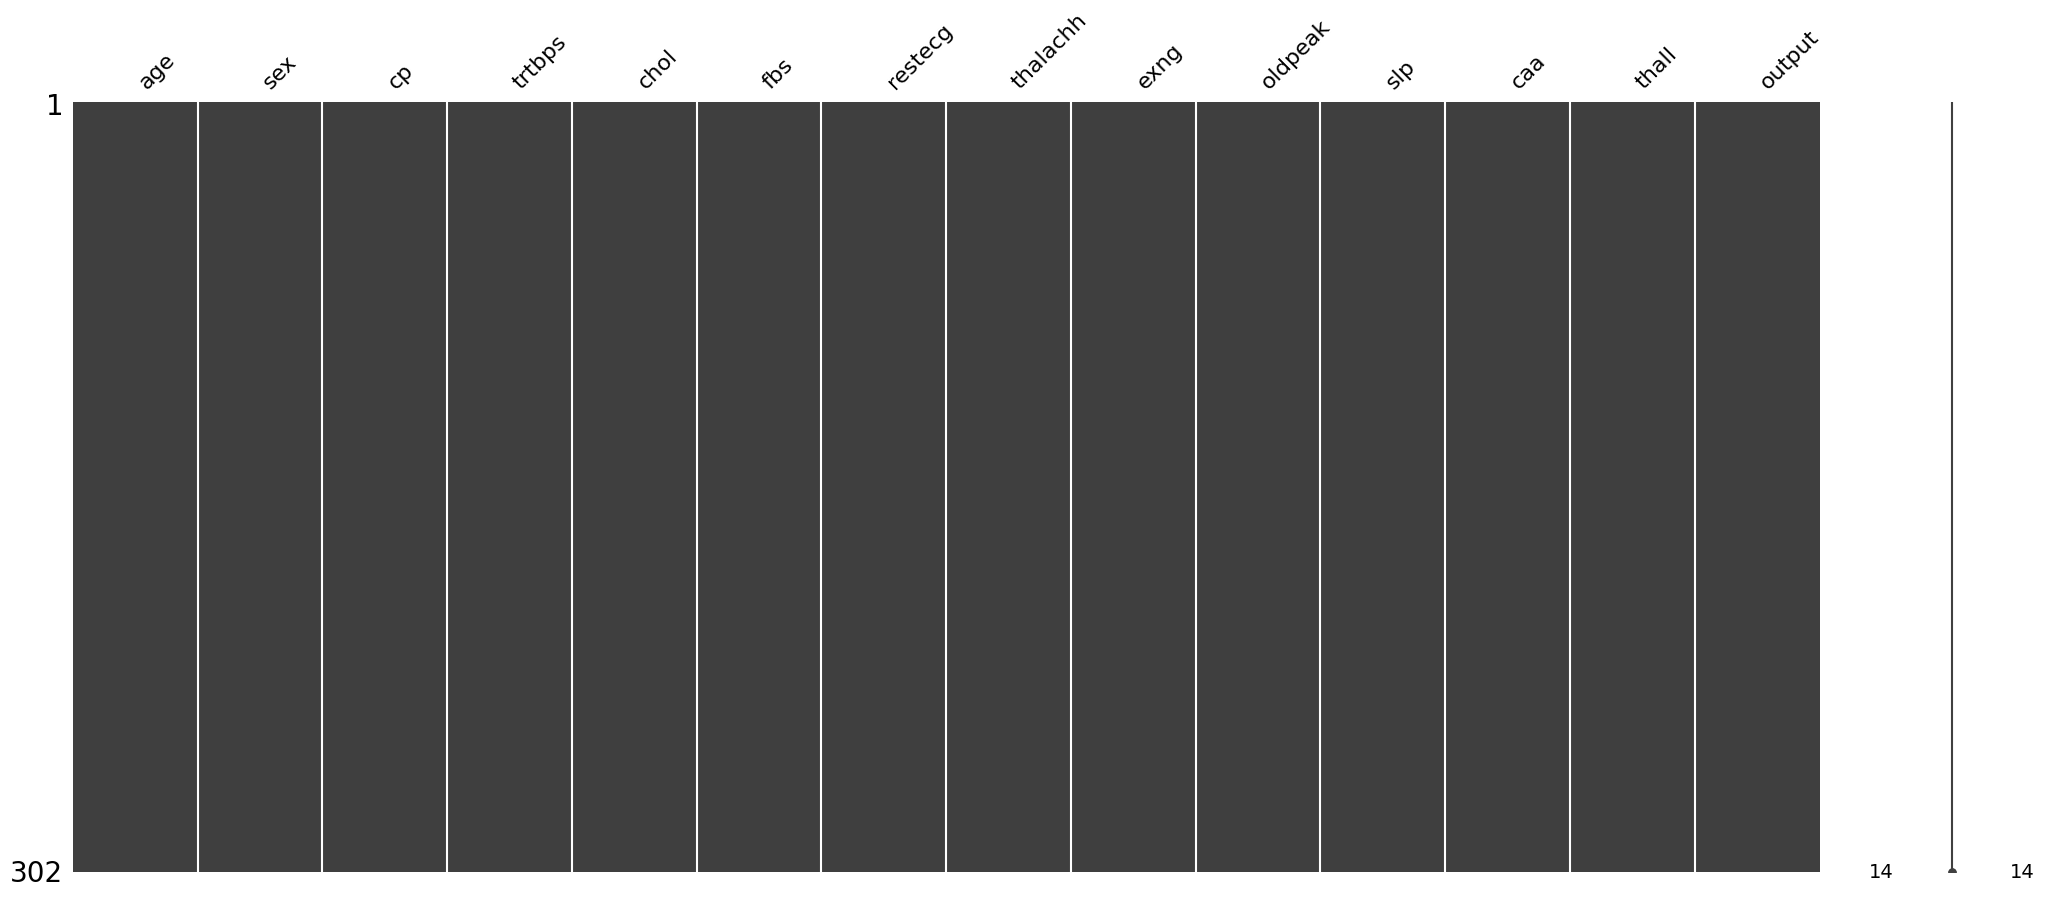

In [8]:
missingno.matrix(df)

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## The Data is now clean with no non-meaningful values '0' or Nans

## Now Lets start with Univariate Analysis

## -Distrubtion of the Sex Feature

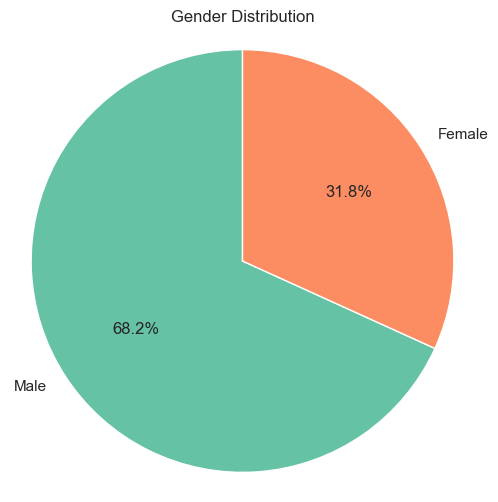

In [10]:

labels = ['Male', 'Female']
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.color_palette("pastel")
plt.pie(df['sex'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, shadow=False, colors=sns.color_palette("Set2"))
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## -Distrubtion of Chest Pain 'cp' Now i will make a Dict to map The Labels To The correct Values


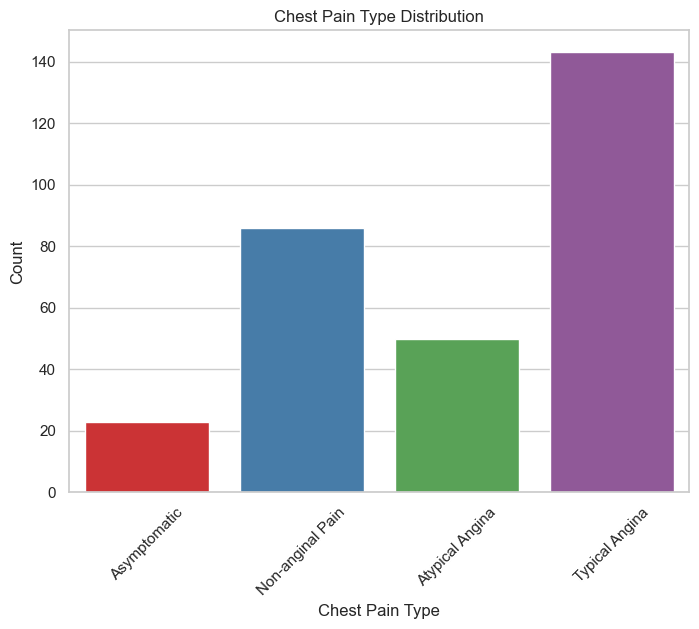

In [11]:

cp_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'}
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['cp'].map(cp_labels), data=df, palette="Set1")

# Add labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type Distribution')
plt.xticks(rotation=45)

# Display the plot
plt.show()


## -Dist of Fasting Blood Sugar

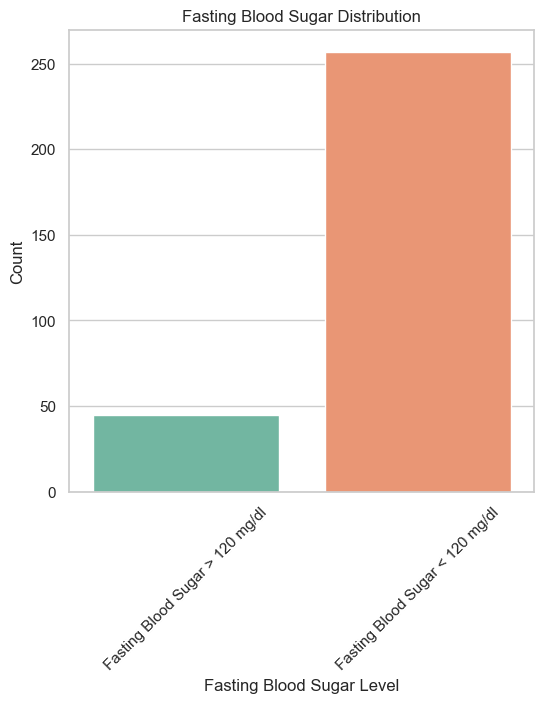

In [12]:

fbs_labels = {0: 'Fasting Blood Sugar < 120 mg/dl', 1: 'Fasting Blood Sugar > 120 mg/dl'}
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['fbs'].map(fbs_labels), data=df, palette="Set2")
plt.xlabel('Fasting Blood Sugar Level')
plt.ylabel('Count')
plt.title('Fasting Blood Sugar Distribution')
plt.xticks(rotation=45)
plt.show()


## -Dist of Resting ECG Results

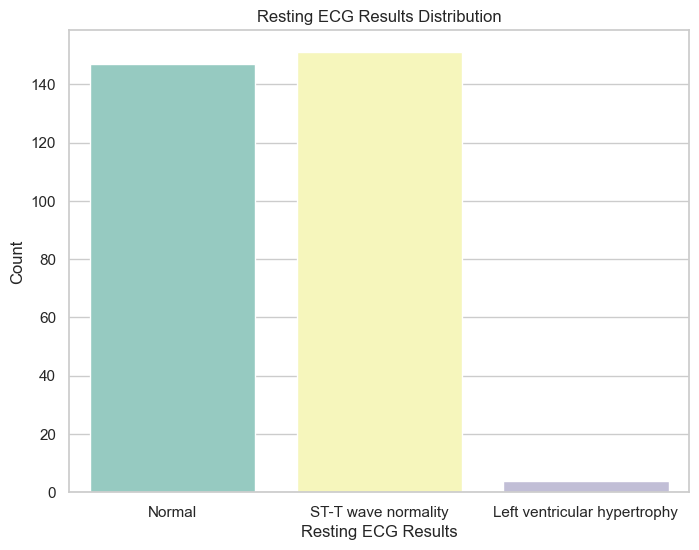

In [13]:

restecg_labels = {0: 'Normal', 1: 'ST-T wave normality', 2: 'Left ventricular hypertrophy'}
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['restecg'].map(restecg_labels), data=df, palette="Set3")
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.title('Resting ECG Results Distribution')
plt.show()


## -Dist of NO.of Major Vessels

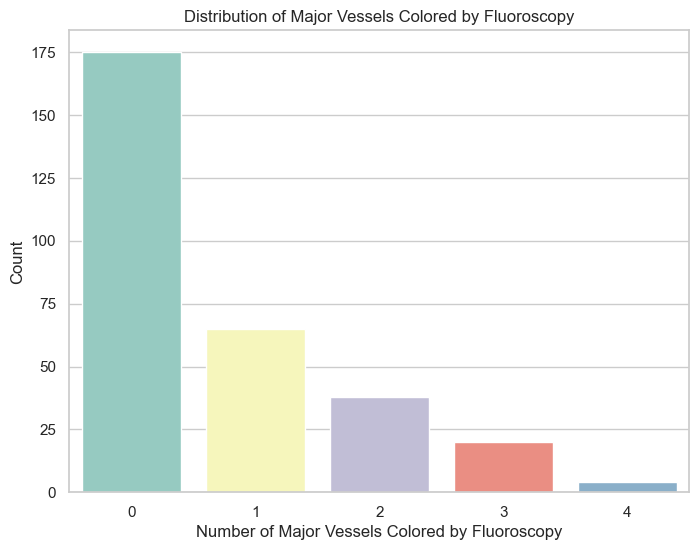

In [14]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='caa', data=df, palette="Set3")
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Count')
plt.title('Distribution of Major Vessels Colored by Fluoroscopy')
plt.show()

## -Dist of Thallium Stress

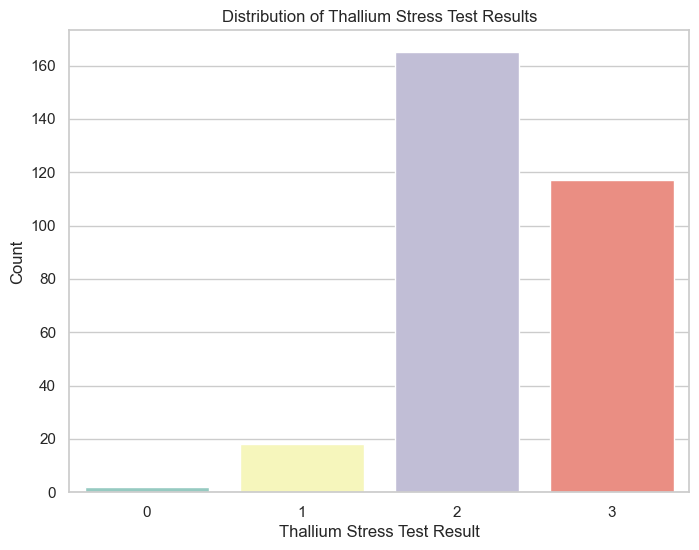

In [15]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='thall', data=df, palette="Set3")
plt.xlabel('Thallium Stress Test Result')
plt.ylabel('Count')
plt.title('Distribution of Thallium Stress Test Results')
plt.show()


## Dist of Exng

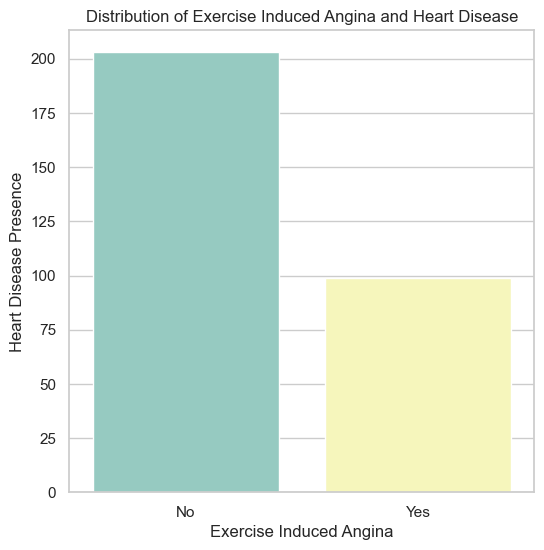

In [16]:

exng_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['exng'].map(exng_labels) ,data=df, palette="Set3")
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Heart Disease Presence')
plt.title('Distribution of Exercise Induced Angina and Heart Disease')
plt.show()



## -Dist of SLP

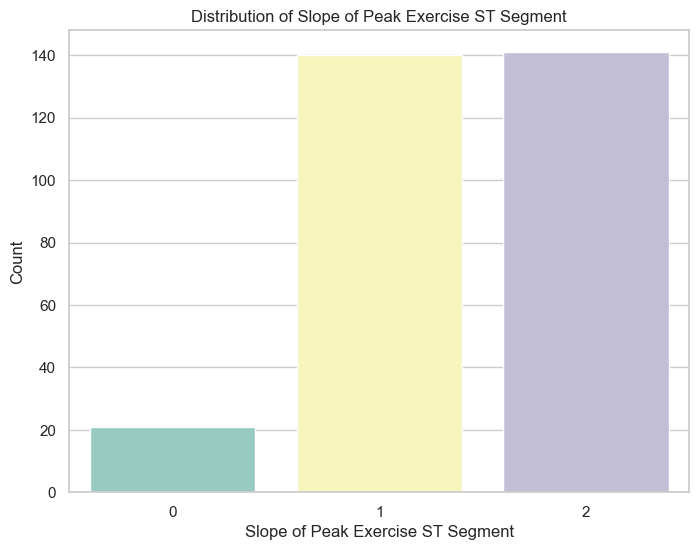

In [17]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='slp', data=df, palette="Set3")
plt.xlabel('Slope of Peak Exercise ST Segment')
plt.ylabel('Count')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.show()


## Now for The Continous Features

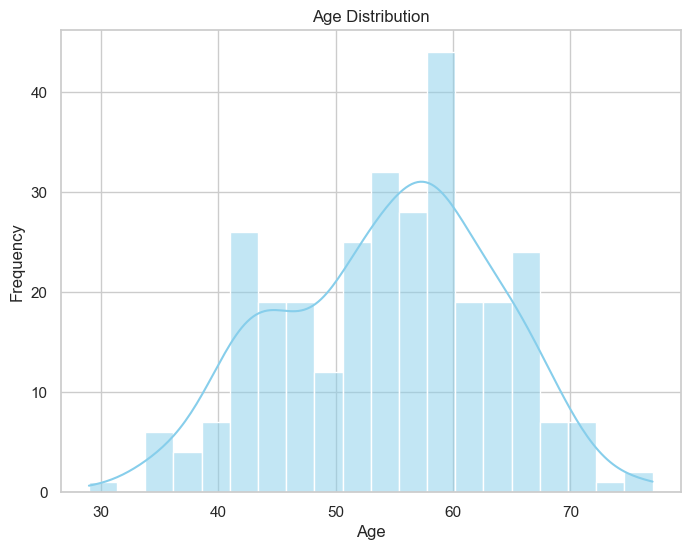

In [18]:

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=20, color="skyblue")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


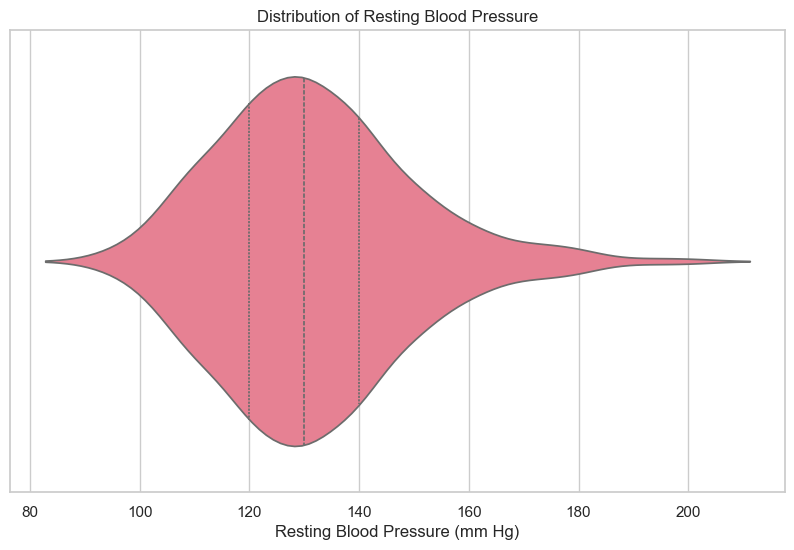

In [19]:

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.violinplot(x='trtbps', data=df, palette="husl", inner="quartile")
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.title('Distribution of Resting Blood Pressure')
plt.show()


## Dist of Chrol

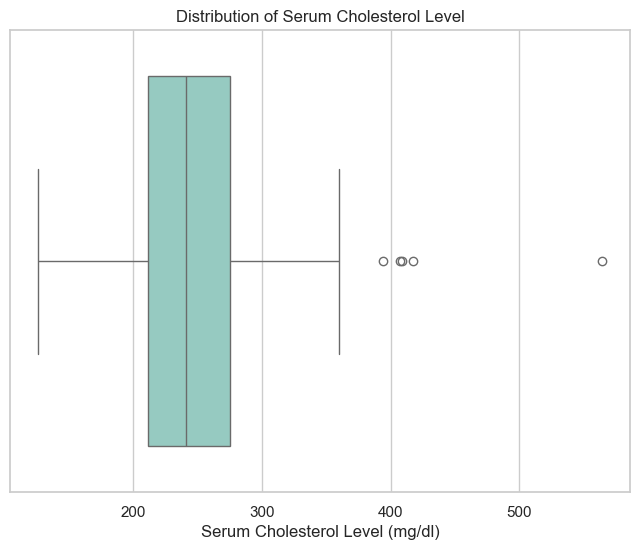

In [20]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(x='chol', data=df, palette="Set3")
plt.xlabel('Serum Cholesterol Level (mg/dl)')
plt.title('Distribution of Serum Cholesterol Level')

plt.show()


## Dist of Thalachh

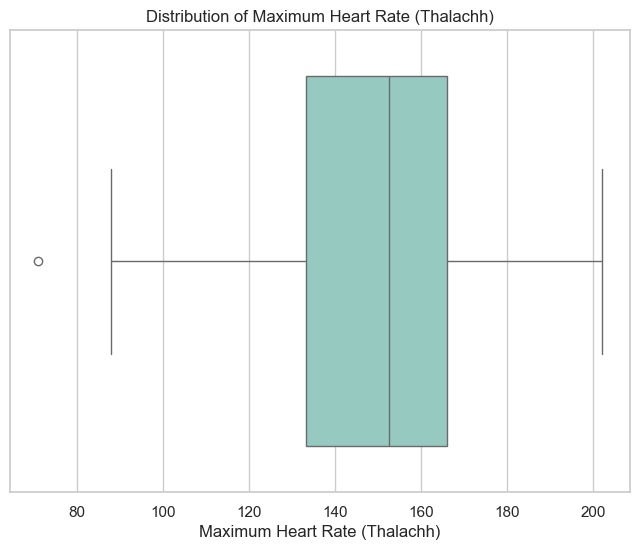

In [21]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(x='thalachh', data=df, palette="Set3")

plt.xlabel('Maximum Heart Rate (Thalachh)')
plt.title('Distribution of Maximum Heart Rate (Thalachh)')

plt.show()


## Dist of Old peak

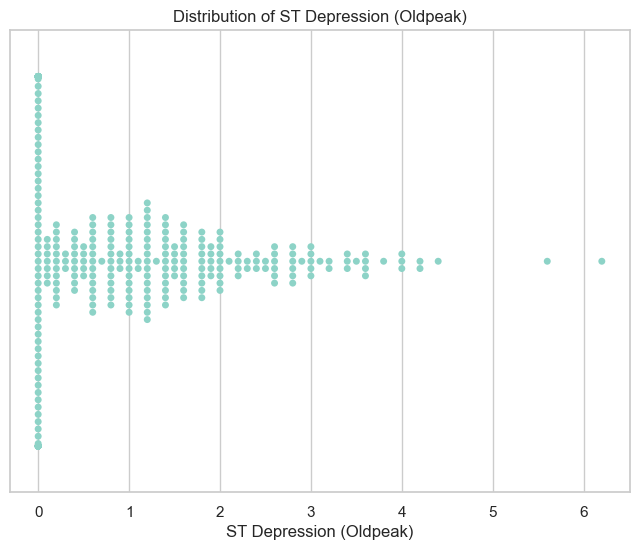

In [22]:


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.swarmplot(x='oldpeak', data=df, palette="Set3")
plt.xlabel('ST Depression (Oldpeak)')
plt.title('Distribution of ST Depression (Oldpeak)')

plt.show()


## Dist of Target

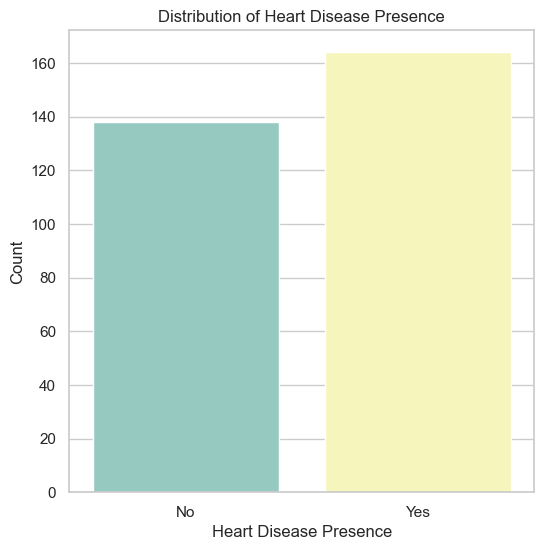

In [23]:


plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.countplot(x='output', data=df, palette="Set3")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Presence')

plt.show()


## The Target is balanced no need for SMOTE

## Bi/Multi variate Analysis

## -Age vs Max Heart Rate with Respect to Output

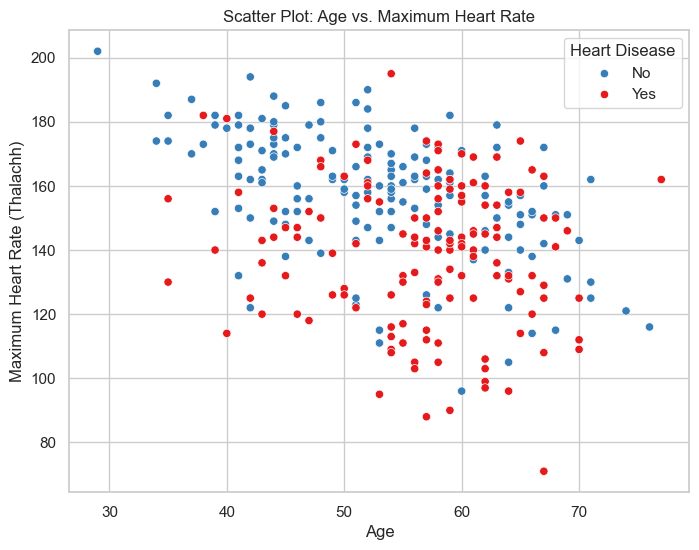

In [24]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalachh', data=df, hue='output', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (Thalachh)')
plt.title('Scatter Plot: Age vs. Maximum Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## Pressure Vs Cholestrol

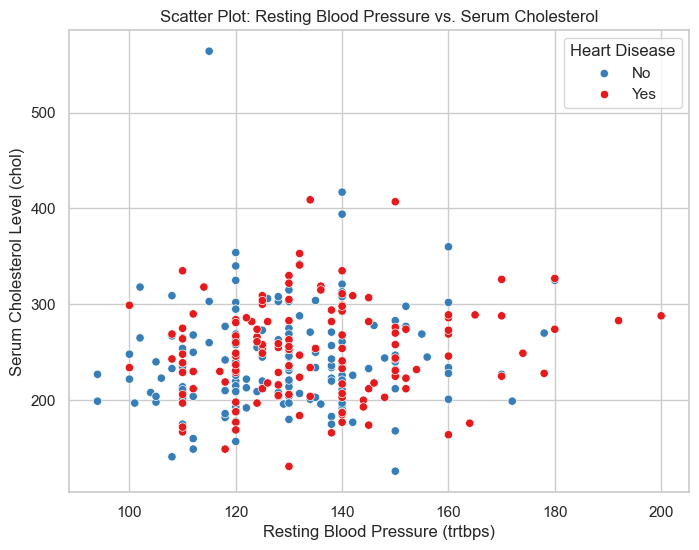

In [25]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x='trtbps', y='chol', data=df, hue='output', palette='Set1')
plt.xlabel('Resting Blood Pressure (trtbps)')
plt.ylabel('Serum Cholesterol Level (chol)')
plt.title('Scatter Plot: Resting Blood Pressure vs. Serum Cholesterol')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## Output vs cpa

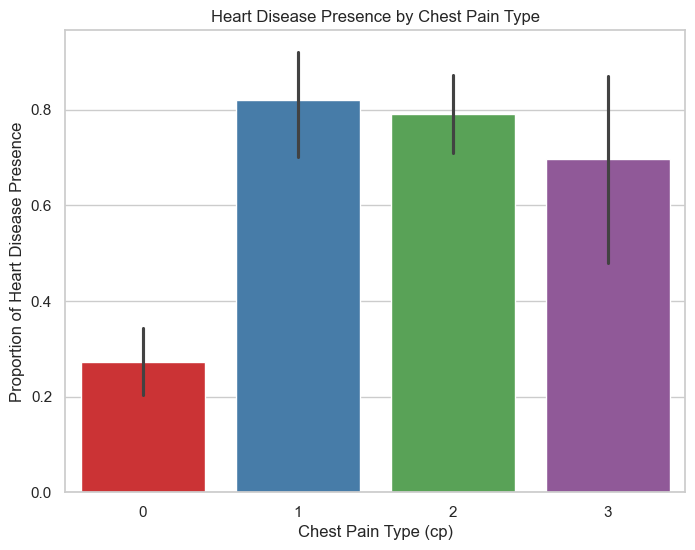

In [26]:

plt.figure(figsize=(8, 6))
sns.barplot(x='cp', y='output', data=df, palette='Set1')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Proportion of Heart Disease Presence')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.show()


## Resting Rate vs output

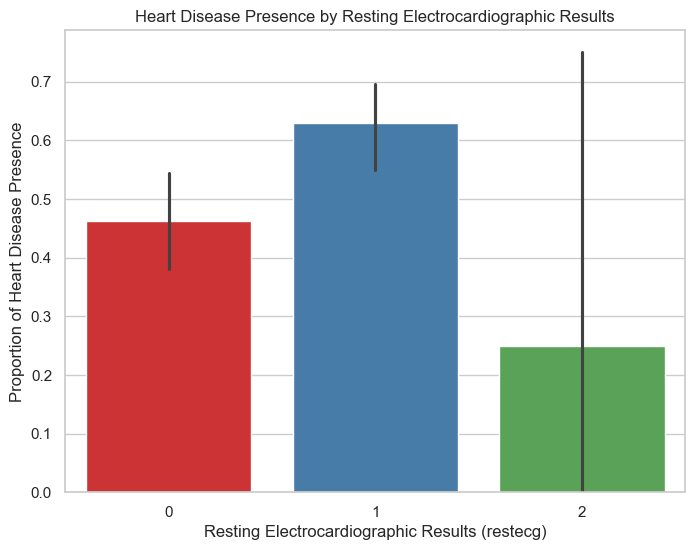

In [27]:

plt.figure(figsize=(8, 6))
sns.barplot(x='restecg', y='output', data=df, palette='Set1')
plt.xlabel('Resting Electrocardiographic Results (restecg)')
plt.ylabel('Proportion of Heart Disease Presence')
plt.title('Heart Disease Presence by Resting Electrocardiographic Results')
plt.show()


## No of Vessels vs output

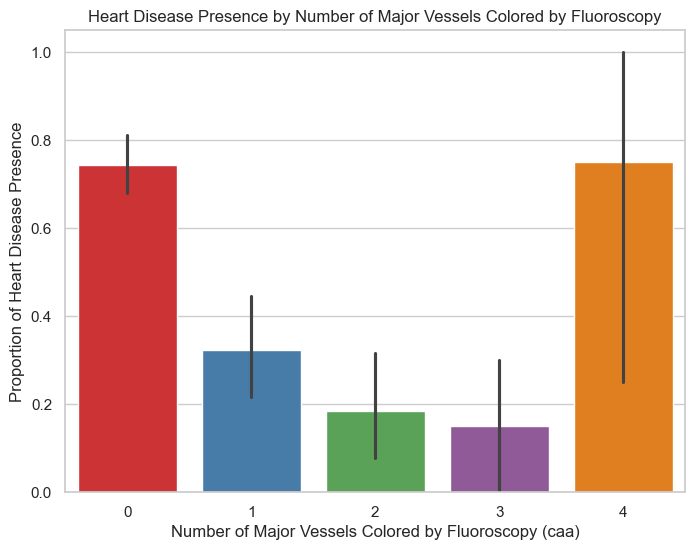

In [28]:

plt.figure(figsize=(8, 6))
sns.barplot(x='caa', y='output', data=df, palette='Set1')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (caa)')
plt.ylabel('Proportion of Heart Disease Presence')
plt.title('Heart Disease Presence by Number of Major Vessels Colored by Fluoroscopy')
plt.show()


## thall vs output

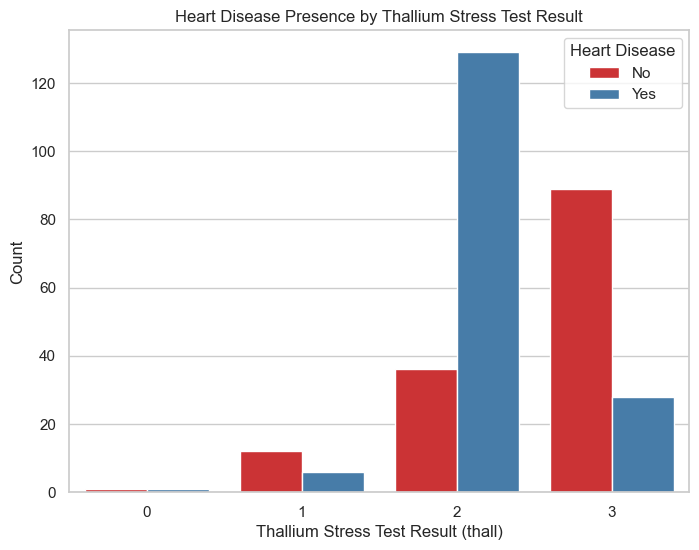

In [29]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='thall', hue='output', data=df, palette='Set1')
plt.xlabel('Thallium Stress Test Result (thall)')
plt.ylabel('Count')
plt.title('Heart Disease Presence by Thallium Stress Test Result')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## EXNG vs output

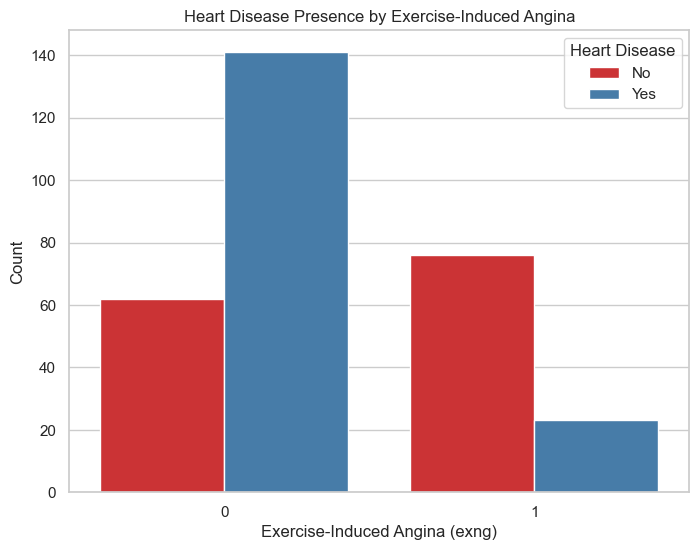

In [30]:


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='exng', hue='output', data=df, palette='Set1')
plt.xlabel('Exercise-Induced Angina (exng)')
plt.ylabel('Count')
plt.title('Heart Disease Presence by Exercise-Induced Angina')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## Sex vs output


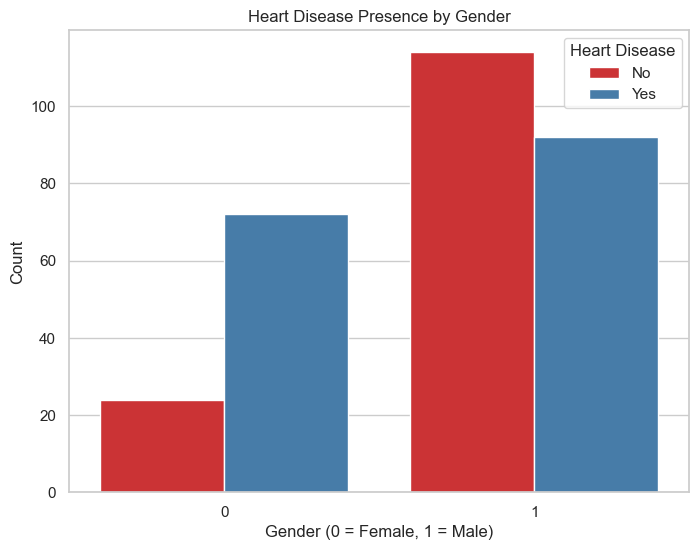

In [31]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='sex', hue='output', data=df, palette='Set1')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Heart Disease Presence by Gender')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## Pairplot

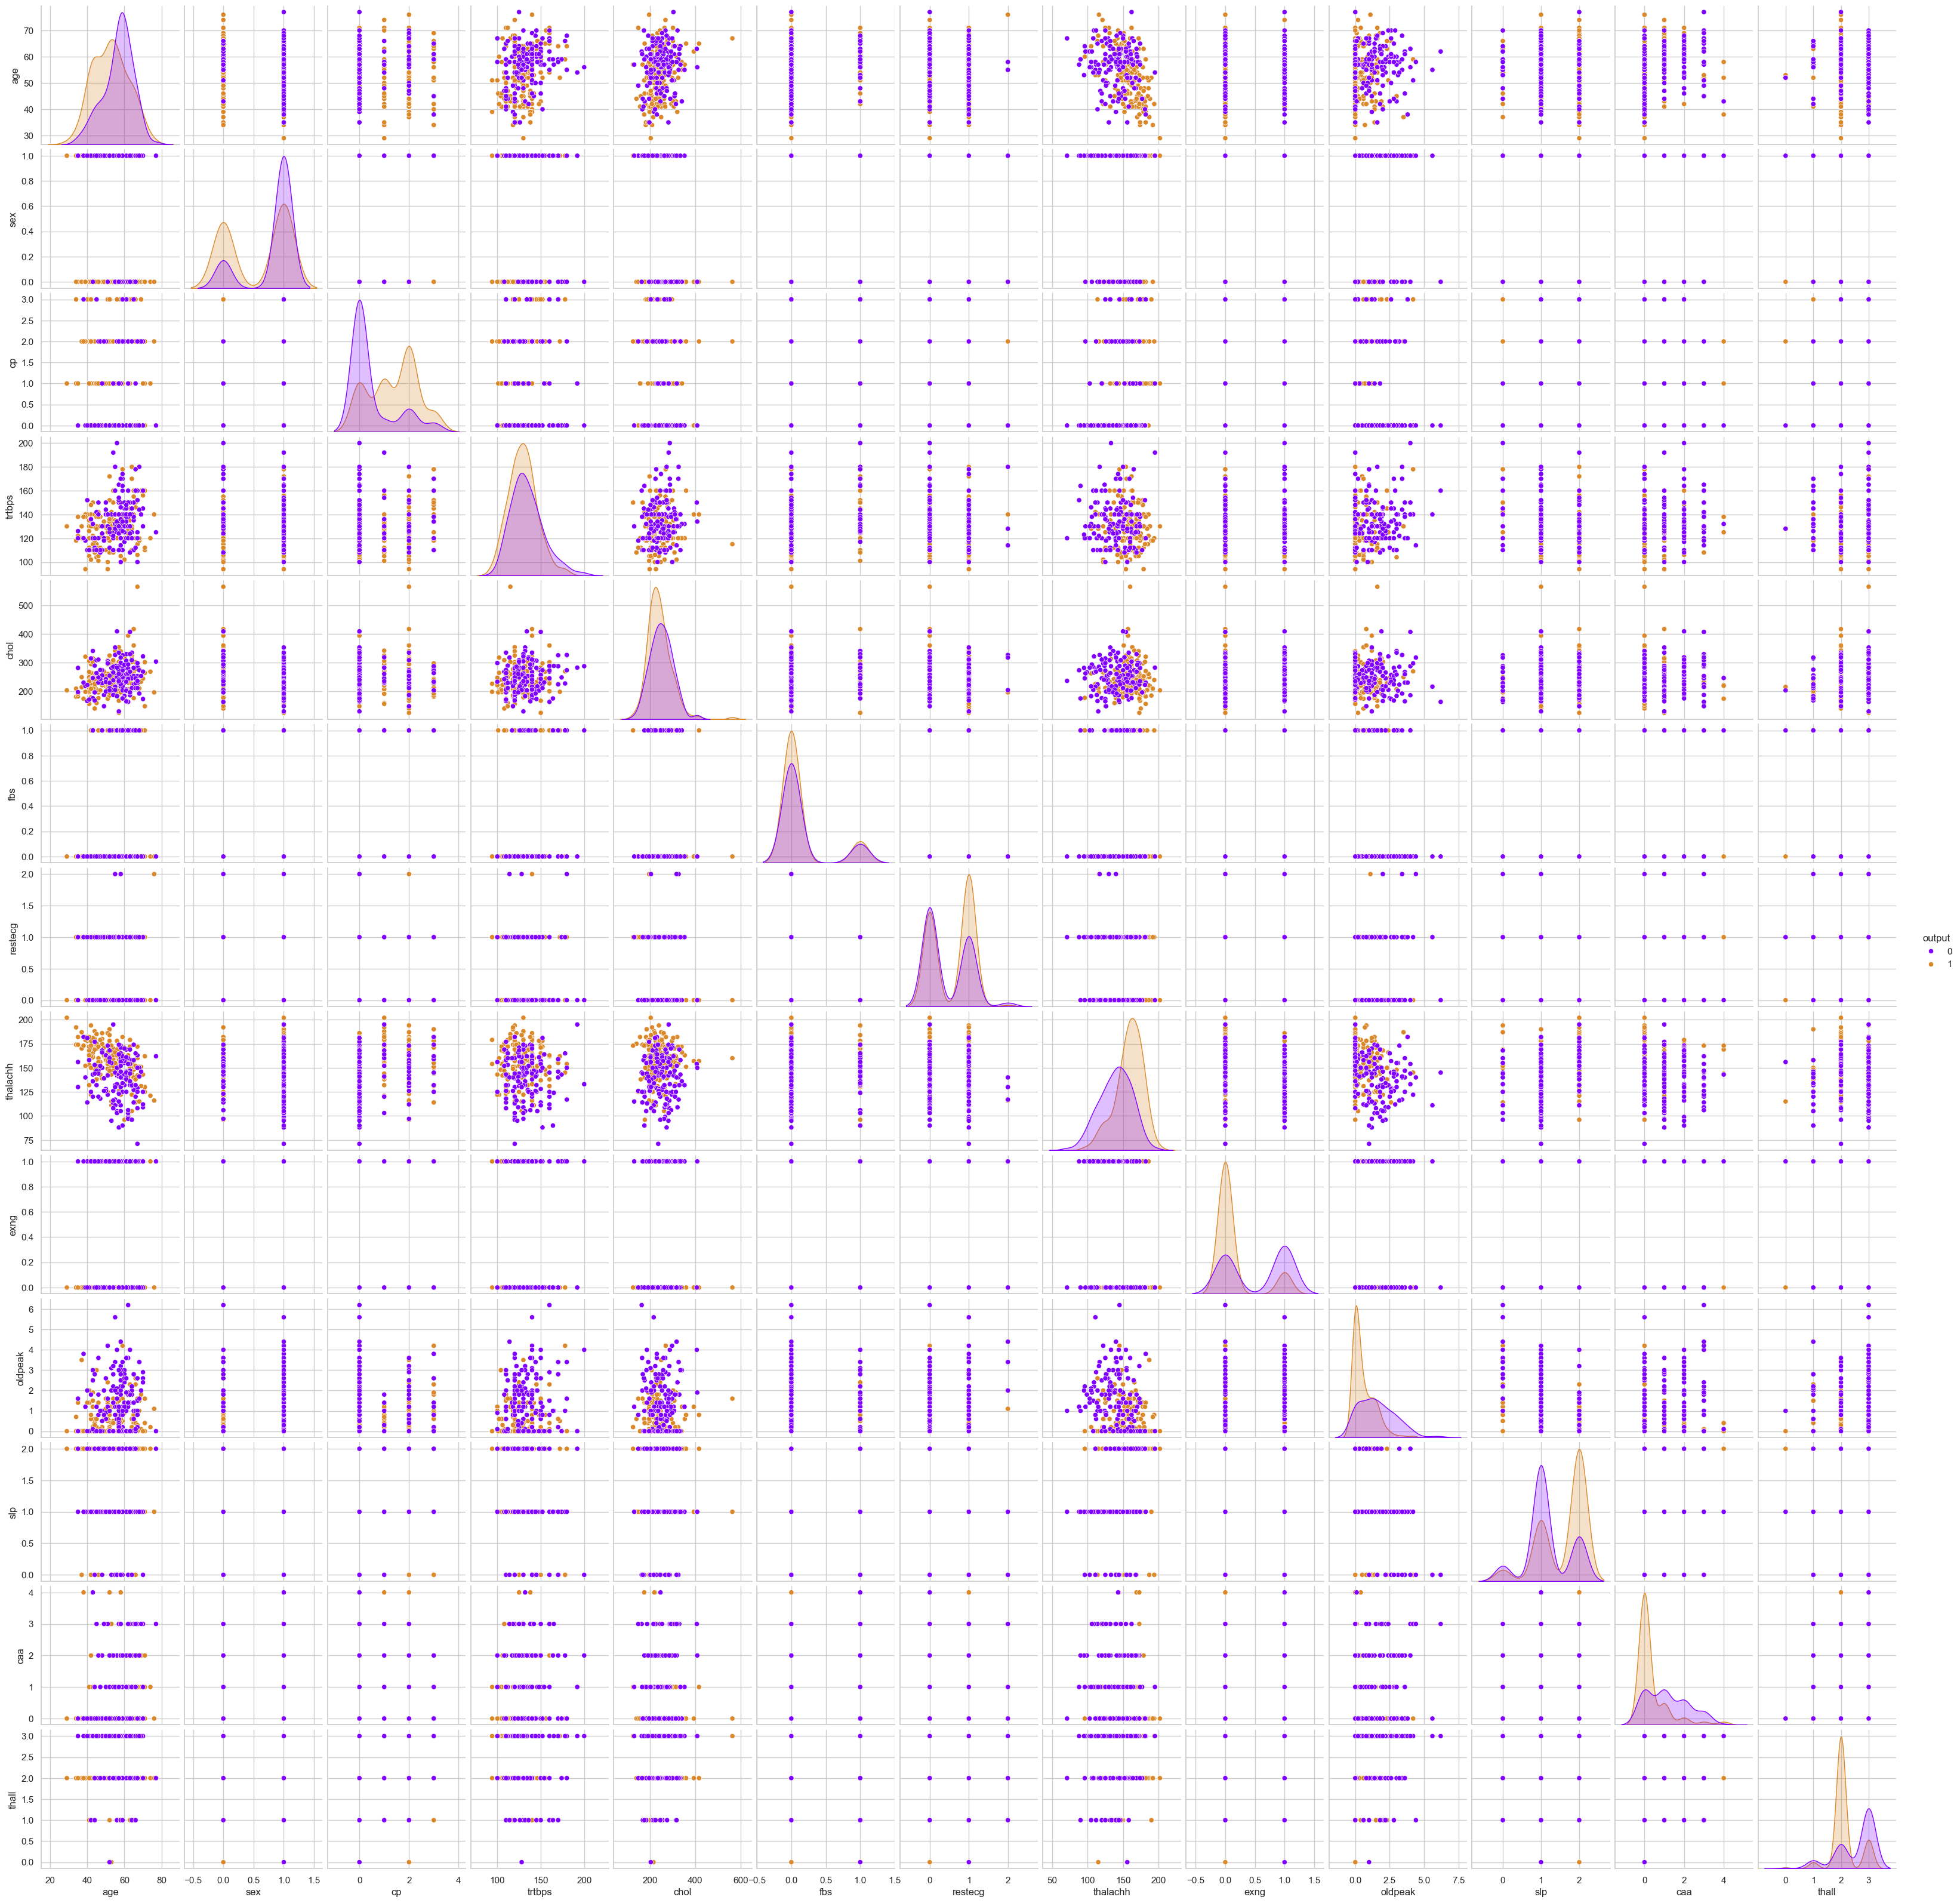

In [32]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

## Correlation Matrix

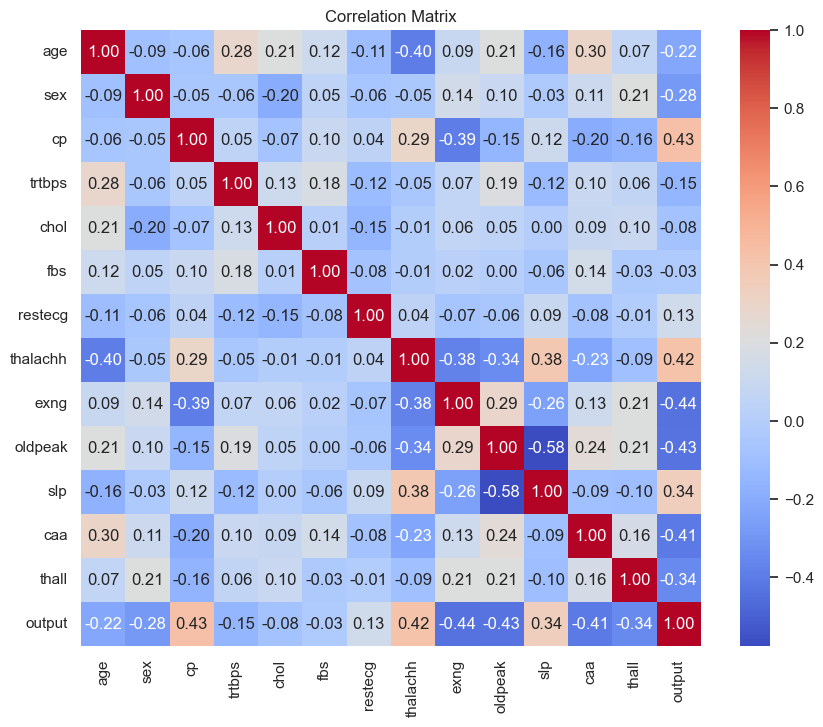

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Feature Engineering

## -Create a new Feature

In [34]:
age_bins = [0, 39, 59, float('inf')]  
age_labels = ['Young', 'Middle-Aged', 'Senior']  
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)
print(df[['age', 'age_category']].head())

   age age_category
0   63       Senior
1   37        Young
2   41  Middle-Aged
3   56  Middle-Aged
4   57  Middle-Aged


## Data Preprocessing


## Splitting the dataset

In [35]:
## to features and target
X = df.drop(columns=['output'], axis=1)
y = df['output']


## split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('**'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (241, 14)
y_train.shape 	 (241,)
****************************************
X_test.shape 	 (61, 14)
y_test.shape 	 (61,)


In [36]:
categ_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall','age_category']
num_cols = ["age","trtbps","chol","thalachh","oldpeak"]

## Pipeline

In [37]:
num_pipline = Pipeline(steps=[
                ('selector', DataFrameSelector(num_cols)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ])

## Categorical
categ_pipline = Pipeline(steps=[
                 ('selector', DataFrameSelector(categ_cols)),
                 ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

all_pipeline = FeatureUnion(transformer_list=[
                        ('num', num_pipline),
                        ('categ', categ_pipline)
                    ])

## apply
X_train_final  = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [38]:
print('X_train_final.shape \t', X_train_final.shape)
print('y_train.shape \t', y_train.shape)
print('**'*20)
print('X_test_final.shape \t', X_test_final.shape)
print('y_test.shape \t', y_test.shape)  ## fine

X_train_final.shape 	 (241, 24)
y_train.shape 	 (241,)
****************************************
X_test_final.shape 	 (61, 24)
y_test.shape 	 (61,)


## Validation and its importance

Validation in the context of machine learning refers to the process of assessing the performance of a trained model on data that it has not seen during the training phase. The primary purpose of validation is to estimate how well the model will generalize to new, unseen data. This is crucial for ensuring that the model is not only memorizing the training data (overfitting) but also learning to make accurate predictions on new, unseen instances.

Here are key reasons why validation is important in machine learning:

Generalization Assessment: Validation helps evaluate how well a model generalizes to new data. It provides an estimate of the model's performance on unseen examples, which is crucial for determining its utility in real-world scenarios.

Overfitting Detection: Overfitting occurs when a model learns the training data too well, capturing noise and idiosyncrasies that are not representative of the underlying patterns. Validation allows you to detect and mitigate overfitting by assessing the model's performance on a separate validation set.

Hyperparameter Tuning: During the model development process, various hyperparameters (e.g., learning rate, regularization strength) are adjusted to optimize performance. Validation provides a means to assess the impact of these hyperparameter choices on the model's ability to generalize.

Model Selection: When experimenting with different algorithms or architectures, validation is used to compare models and choose the one that performs best on unseen data. It aids in selecting the most appropriate model for a specific task.

Avoiding Data Leakage: Validation sets help ensure that the model has not inadvertently learned information from the test set or any other data it should not have access to during training. This is important for maintaining the integrity of the evaluation process.

Common methods for validation include:

Holdout Validation: Splitting the dataset into training and validation sets. The model is trained on the training set and evaluated on the validation set.

K-Fold Cross-Validation: Dividing the dataset into k subsets (folds), using k-1 folds for training and the remaining one for validation. This process is repeated k times, and the performance is averaged.

Stratified Sampling: Ensuring that the distribution of classes in the validation set is representative of the overall dataset. This is particularly important for imbalanced datasets.

In summary, validation is a critical step in the machine learning workflow, ensuring that models are reliable, generalize well, and perform effectively on new, unseen data.

## Parameter Tuning and its importance


Parameter tuning, also known as hyperparameter tuning, refers to the process of systematically adjusting the hyperparameters of a machine learning model to optimize its performance. Hyperparameters are external configuration settings that are not learned from the data but are set prior to the training process. Examples of hyperparameters include learning rates, regularization strengths, and the number of hidden layers or nodes in a neural network.

The primary goals of parameter tuning are:

Optimizing Performance - The main objective of parameter tuning is to find the combination of hyperparameter values that leads to the best possible performance of the model on a given task. This involves improving metrics such as accuracy, precision, recall, F1-score, or other relevant performance measures.

Avoiding Overfitting =  Hyperparameter tuning helps prevent overfitting, a situation where a model performs well on the training data but fails to generalize to new, unseen data. By adjusting hyperparameters, you can find a balance that results in good performance on both the training and validation sets.

Enhancing Generalization: Tuning hyperparameters enhances the model ability to generalize patterns from the training data to new instances. This is crucial for ensuring that the model performs well in real-world scenarios and on data it has not encountered during training.

Finding Model Complexity: Hyperparameters often control the complexity of a model. Adjusting them allows you to find the right level of complexity that captures the underlying patterns in the data without introducing unnecessary noise.

Common hyperparameter tuning techniques include:

Grid Search: Exhaustively searching a predefined hyperparameter space by evaluating the model performance for every possible combination of hyperparameter values.

Random Search: Sampling hyperparameter values randomly from predefined ranges, allowing for a more efficient search in a large hyperparameter space.

Bayesian Optimization: An iterative optimization process that models the objective function (model performance) and intelligently selects hyperparameter values to improve performance.

Gradient-Based Optimization: Using optimization algorithms, such as gradient descent, to iteratively adjust hyperparameters based on their impact on a chosen objective function.

In conclusion, hyperparameter tuning is crucial for obtaining the best possible performance from a machine learning model. It involves systematic experimentation with different hyperparameter values to find the configuration that optimizes the model ability to generalize and make accurate predictions on new, unseen data.

## Modeling

## -SVM

In [39]:
svc_clf =SVC(kernel='linear', random_state=45,probability=True)
svc_clf.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_svc= svc_clf.predict(X_train_final)
y_pred_test_svc= svc_clf.predict(X_test_final)

## Evaluate
score_train_svc = f1_score(y_train, y_pred_train_svc)
score_test_svc  = f1_score(y_test, y_pred_test_svc)

print(f'Score for Training Dataset using SVC {score_train_svc * 100 :.3f}')
print(f'Score for Testing Dataset using SVC {score_test_svc * 100 :.3f}')

Score for Training Dataset using SVC 92.193
Score for Testing Dataset using SVC 83.117


In [40]:
report = classification_report(y_test, y_pred_test_svc)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



## Lets Try Tuning it a bit

In [41]:
param_grid = {
    'C': np.arange(1,10,1),  
    'gamma': [0.001, 0.01, 0.1, 1] 
}
svc=SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)
print("The best params are :", grid_search.best_params_)
print("The best score is   :", grid_search.best_score_)


# predicting the values
y_pred =grid_search.predict(X_test_final)
y_pred_train=grid_search.predict(X_train_final)
# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 3, 'gamma': 0.01}
The best score is   : 0.8422619047619048
The test accuracy score of SVM after hyper-parameter tuning is  0.7704918032786885


In [42]:
report2 = classification_report(y_test, y_pred)
print('Classification Report:')
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        28
           1       0.72      0.94      0.82        33

    accuracy                           0.77        61
   macro avg       0.80      0.76      0.76        61
weighted avg       0.80      0.77      0.76        61



In [43]:
score_train_svc = f1_score(y_train, y_pred_train)
score_test_svc  = f1_score(y_test, y_pred)

print(f'Score for Training Dataset using SVC {score_train_svc * 100 :.3f}')
print(f'Score for Testing Dataset using SVC {score_test_svc * 100 :.3f}')

Score for Training Dataset using SVC 88.148
Score for Testing Dataset using SVC 81.579


## 2-RFC

In [44]:

forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_forest = forst_clf.predict(X_test_final)

## Evaluate
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'Score for Training Dataset using RF without solve imbalancing {score_train_forest * 100 :.3f}')
print(f'Score for Testing Dataset using RF without solve imbalancing {score_test_forest * 100 :.3f}')

Score for Training Dataset using RF without solve imbalancing 95.849
Score for Testing Dataset using RF without solve imbalancing 81.081


In [45]:
report3 = classification_report(y_test, y_pred_test_forest)
print('Classification Report:')
print(report3)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        28
           1       0.73      0.91      0.81        33

    accuracy                           0.77        61
   macro avg       0.79      0.76      0.76        61
weighted avg       0.79      0.77      0.76        61



## After tuning


In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Set up GridSearchCV with cross-validation
grid_search2 = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search2.fit(X_train_final, y_train)

print("The best params are :", grid_search2.best_params_)
print("The best score is   :", grid_search2.best_score_)


# predicting the values
y_pred2 =grid_search2.predict(X_test_final)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred2))

The best params are : {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
The best score is   : 0.8295068027210885
The test accuracy score of SVM after hyper-parameter tuning is  0.7540983606557377


In [47]:
report4= classification_report(y_test, y_pred2)
print('Classification Report:')
print(report4)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        28
           1       0.70      0.94      0.81        33

    accuracy                           0.75        61
   macro avg       0.79      0.74      0.74        61
weighted avg       0.79      0.75      0.74        61



In [57]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

feature_importances = forst_clf.feature_importances_
print("Feature Importances:")
    
sorted_features = sorted(enumerate(feature_importances), key=lambda x: x[1], reverse=True)
    
for i, (feature_index, importance) in enumerate(sorted_features):
    print(f"Rank {i+1}: Feature {feature_index} - Importance: {importance:.4f}")


perm_importances = permutation_importance(forst_clf, X_test_final, y_test, n_repeats=30, random_state=0)


print("\nPermutation Importances:")
for i, (feature_index, imp) in enumerate(sorted(zip(range(X.shape[1]), perm_importances.importances_mean), key=lambda x: x[1], reverse=True)):
    print(f"Rank {i+1}: Feature {feature_index} - Importance: {imp:.4f}")


Feature Importances:
Rank 1: Feature 3 - Importance: 0.1363
Rank 2: Feature 20 - Importance: 0.1282
Rank 3: Feature 4 - Importance: 0.1060
Rank 4: Feature 6 - Importance: 0.1042
Rank 5: Feature 21 - Importance: 0.0886
Rank 6: Feature 0 - Importance: 0.0562
Rank 7: Feature 1 - Importance: 0.0542
Rank 8: Feature 18 - Importance: 0.0526
Rank 9: Feature 2 - Importance: 0.0473
Rank 10: Feature 17 - Importance: 0.0416
Rank 11: Feature 12 - Importance: 0.0322
Rank 12: Feature 7 - Importance: 0.0294
Rank 13: Feature 5 - Importance: 0.0262
Rank 14: Feature 15 - Importance: 0.0185
Rank 15: Feature 8 - Importance: 0.0168
Rank 16: Feature 13 - Importance: 0.0161
Rank 17: Feature 11 - Importance: 0.0159
Rank 18: Feature 9 - Importance: 0.0096
Rank 19: Feature 22 - Importance: 0.0074
Rank 20: Feature 14 - Importance: 0.0054
Rank 21: Feature 19 - Importance: 0.0041
Rank 22: Feature 23 - Importance: 0.0019
Rank 23: Feature 10 - Importance: 0.0009
Rank 24: Feature 16 - Importance: 0.0003



Permutation Importances:
Rank 1: Feature 4 - Importance: 0.0295
Rank 2: Feature 8 - Importance: 0.0251
Rank 3: Feature 3 - Importance: 0.0175
Rank 4: Feature 9 - Importance: 0.0158
Rank 5: Feature 6 - Importance: 0.0126
Rank 6: Feature 0 - Importance: 0.0115
Rank 7: Feature 1 - Importance: 0.0098
Rank 8: Feature 12 - Importance: 0.0087
Rank 9: Feature 13 - Importance: 0.0038
Rank 10: Feature 10 - Importance: 0.0000
Rank 11: Feature 11 - Importance: -0.0011
Rank 12: Feature 5 - Importance: -0.0087
Rank 13: Feature 7 - Importance: -0.0087
Rank 14: Feature 2 - Importance: -0.0098


In [58]:
# Assuming feature_importances is the array of feature importances
num_features_to_keep = 10

# Get indices of the top features to keep
top_feature_indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)[:num_features_to_keep]

# Subset your data with only the top features
X_subset = X_train_final[:, top_feature_indices]

# Display the selected top feature indices
print(f"Selected Top Feature Indices: {top_feature_indices}")


Selected Top Feature Indices: [3, 20, 4, 6, 21, 0, 1, 18, 2, 17]


In [60]:
X_subset.shape

(241, 10)

In [62]:

forst_clf2 = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf2.fit(X_subset, y_train)

## Predict and evaluate 
y_pred_train_forest3 = forst_clf.predict(X_train_final)
y_pred_test_forest3 = forst_clf.predict(X_test_final)

## Evaluate
score_train_forest3= f1_score(y_train, y_pred_train_forest3)
score_test_forest3= f1_score(y_test, y_pred_test_forest3)

print(f'Score for Training Dataset using RF  {score_train_forest3 * 100 :.3f}')
print(f'Score for Testing Dataset using RF {score_test_forest3 * 100 :.3f}')

Score for Training Dataset using RF  95.849
Score for Testing Dataset using RF 81.081


## 4-KNN

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=3, p=2,weights='distance')
knn_clf.fit(X_train_final, y_train)

y_pred_train_knn = knn_clf.predict(X_train_final)
y_pred_test_knn = knn_clf.predict(X_test_final)

score_train_knn = f1_score(y_train, y_pred_train_knn)
score_test_knn = f1_score(y_test, y_pred_test_knn)

print(f'Score for Training Dataset using KNN after SMOTE {score_train_knn * 100 :.3f}')
print(f'Score for Testing Dataset using KNN after SMOTE {score_test_knn * 100 :.3f}')

Score for Training Dataset using KNN after SMOTE 100.000
Score for Testing Dataset using KNN after SMOTE 82.667


In [49]:
report5= classification_report(y_test, y_pred_test_knn)
print('Classification Report:')
print(report5)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



## I'm going to pick SVC

In [50]:
report = classification_report(y_test, y_pred_test_svc)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



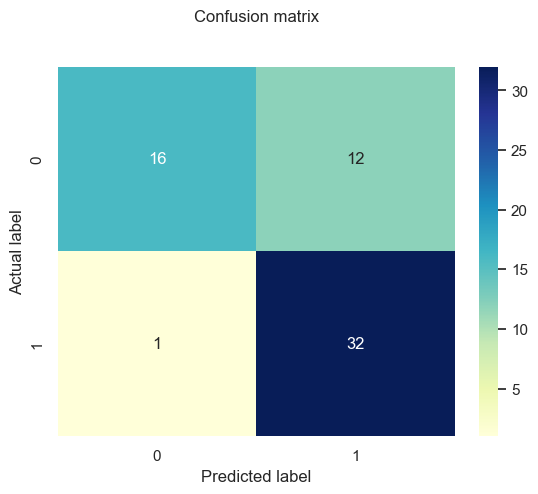

In [51]:

cnf_matrix =confusion_matrix(y_test, y_pred_test_svc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

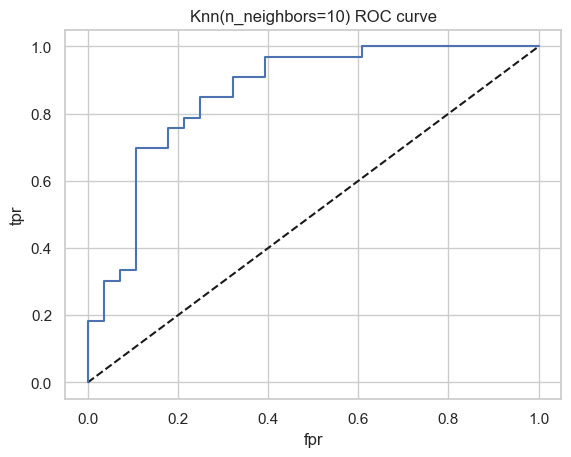

In [52]:
from sklearn.metrics import roc_curve
y_pred_proba = svc_clf.predict_proba(X_test_final)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=10) ROC curve')
plt.show()

## Dumping the model

In [53]:
joblib.dump(svc_clf, 'svc_model.pkl') 

['svc_model.pkl']